# MINST
这个项目的目标是使用pytorch训练一个神经网络用来识别MINST数据集

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
from torch.utils.data import DataLoader

## 加载数据

In [2]:
train_data = torchvision.datasets.MNIST(root='./data/',
                                        train=True,
                                       transform=torchvision.transforms.ToTensor(),
                                       download=False)
test_data = torchvision.datasets.MNIST(root='./data/',
                                        train=False,
                                       transform=torchvision.transforms.ToTensor(),
                                       download=False)


### 数据集信息

train data size  torch.Size([60000, 28, 28])
test data size  torch.Size([10000, 28, 28])


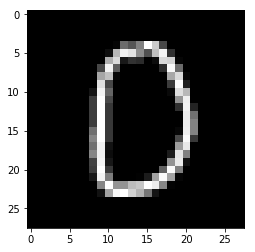

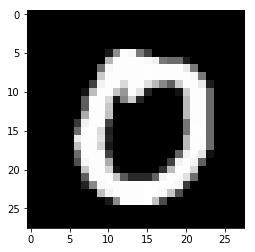

In [3]:
print("train data size ", train_data.data.size())
print("test data size ", test_data.data.size())
plt.imshow(train_data.data[random.randint(0,train_data.data.size()[0])],
          cmap='gray')
plt.show()
plt.imshow(test_data.data[random.randint(0,test_data.data.size()[0])],
          cmap='gray')
plt.show()

### 创建Dataloader

In [4]:
batch_size = 10
train_loader = DataLoader(train_data,
                          batch_size=batch_size,
                         shuffle=True,
                         num_workers=4)
test_loader = DataLoader(test_data,
                          batch_size=batch_size,
                         shuffle=True,
                        num_workers=4)

## 定义网络

In [5]:
class Net(nn.Module):
    def __init__(self,input_size,output_size):
        super(Net,self).__init__()
        self.flatten = Flatten()
        self.fc1 = nn.Linear(input_size,input_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(input_size,output_size)
        
    
    def forward(self,x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class Flatten(nn.Module):
    def forward(self,x):
        return x.view(x.shape[0],-1)
    
net = Net(28*28,10)
print(net)

Net(
  (flatten): Flatten()
  (fc1): Linear(in_features=784, out_features=784, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=784, out_features=10, bias=True)
)


## 预测样例

In [6]:
def net_sample_output():
    for i, sample in enumerate(train_loader):
        data = sample[0]
        labels = sample[1]
        
        outputs = net(data)
        
        if i == 0:
            return data,outputs,labels
        
def visual_output(imgs,outputs,labels=None):
    for i in range(batch_size):
        img = imgs[i].view(28,28)
        output = outputs[i]
        plt.imshow(img,cmap='gray')
        if labels is not None:
            label = labels[i]
            print(f"prediction:{torch.argmax(output)},label:{label}")
        else:
            print(f"prediction:{torch.argmax(output)}")
        plt.show()
    

prediction:8,label:9


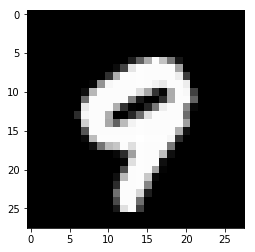

prediction:7,label:7


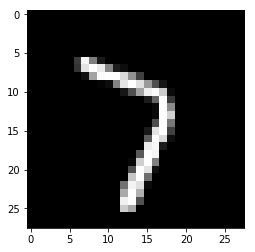

prediction:7,label:4


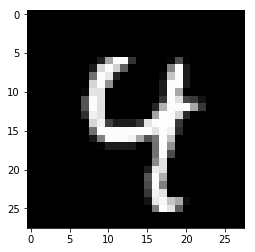

prediction:8,label:6


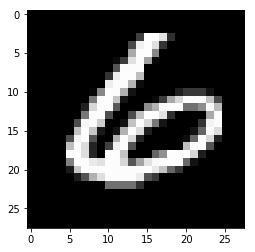

prediction:3,label:3


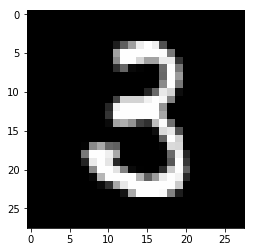

prediction:7,label:2


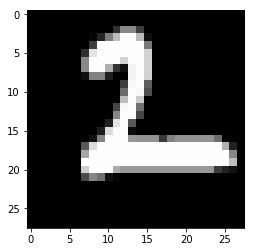

prediction:8,label:9


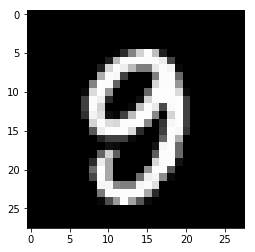

prediction:2,label:9


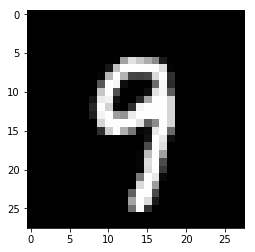

prediction:9,label:8


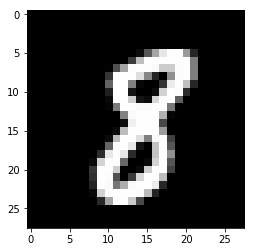

prediction:1,label:6


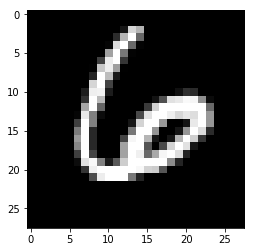

In [7]:
data,outputs,labels = net_sample_output()
visual_output(data,outputs,labels)

## 开始训练

In [8]:
net = Net(28*28,10)

net.train()

optimizer = optim.SGD(net.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

n_epoch = 100
num_of_batch = 100

for epoch in range(n_epoch):
    running_loss = 0.0
    for batch_i,data in enumerate(train_loader):
        if batch_i == num_of_batch:
            break
        
        imgs = data[0]
        labels = data[1]
        
        outputs = net(imgs)
        loss = criterion(outputs,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data
    
    test_loss = 0.1
    acc = 0.0
    for batch_i,data in enumerate(test_loader):
        if batch_i == num_of_batch/5:
            break
        imgs = data[0]
        labels = data[1]
        with torch.no_grad():
            outputs = net(imgs)
            output_labels = torch.argmax(outputs,dim=1)
            
            acc += float(torch.sum(output_labels==labels))
            loss = criterion(outputs,labels)
            test_loss += loss.data
        

    print(f"""epoch:{epoch+1},Avg.loss:{running_loss/num_of_batch/batch_size:.5f},test loss:{test_loss/num_of_batch*5/batch_size:.5f},acc:{acc/num_of_batch*5/batch_size*100:.2f}%""")

epoch:1,Avg.loss:0.21838,test loss:0.20495,acc:55.00%
epoch:2,Avg.loss:0.18689,test loss:0.16964,acc:70.00%
epoch:3,Avg.loss:0.15296,test loss:0.13045,acc:77.50%
epoch:4,Avg.loss:0.12243,test loss:0.10559,acc:78.00%
epoch:5,Avg.loss:0.09929,test loss:0.10204,acc:75.50%
epoch:6,Avg.loss:0.08503,test loss:0.08354,acc:77.50%
epoch:7,Avg.loss:0.07416,test loss:0.06909,acc:85.00%
epoch:8,Avg.loss:0.06612,test loss:0.06951,acc:81.00%
epoch:9,Avg.loss:0.06103,test loss:0.04882,acc:89.50%
epoch:10,Avg.loss:0.05781,test loss:0.04718,acc:90.00%
epoch:11,Avg.loss:0.05811,test loss:0.05246,acc:86.50%
epoch:12,Avg.loss:0.05215,test loss:0.05012,acc:87.50%
epoch:13,Avg.loss:0.04750,test loss:0.05161,acc:85.00%
epoch:14,Avg.loss:0.04686,test loss:0.04011,acc:90.00%
epoch:15,Avg.loss:0.04366,test loss:0.04989,acc:87.50%
epoch:16,Avg.loss:0.04357,test loss:0.03946,acc:91.50%
epoch:17,Avg.loss:0.04385,test loss:0.04285,acc:90.00%
epoch:18,Avg.loss:0.04523,test loss:0.04509,acc:88.50%
epoch:19,Avg.loss:0

## Evaluation

prediction:2,label:2


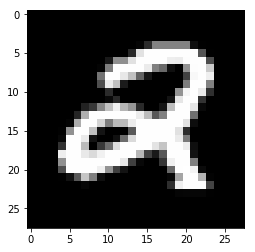

prediction:2,label:2


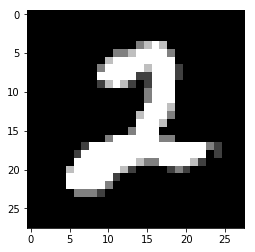

prediction:7,label:7


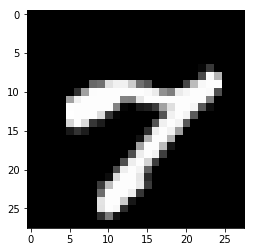

prediction:4,label:4


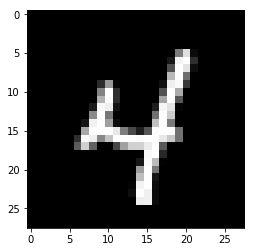

prediction:5,label:5


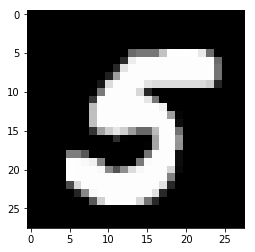

prediction:0,label:0


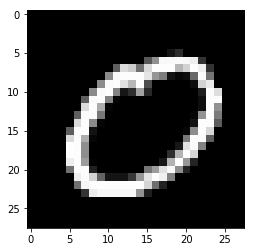

prediction:5,label:5


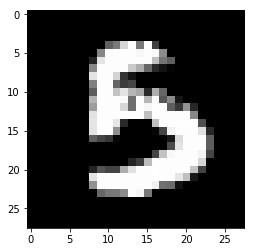

prediction:8,label:8


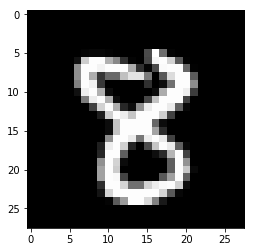

prediction:5,label:5


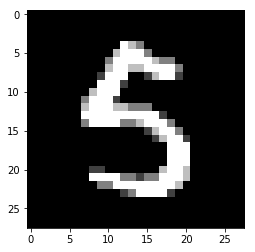

prediction:3,label:3


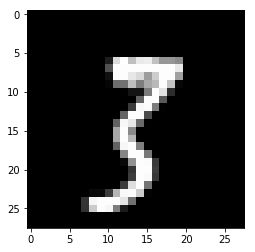

In [10]:
data,outputs,labels = net_sample_output()
visual_output(data,outputs,labels)

## 卷积网络

In [15]:
class CNN(nn.Module):
    def __init__(self,input_planes,num_classes):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(input_planes, 8, kernel_size=3, stride=1,
                     padding=1, bias=False)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(8,16,kernel_size=3,stride=1,
                               padding=1,bias=False)
        self.flatten = Flatten()
        self.fc = nn.Linear(7*7*16,num_classes)
        
    def forward(self,x):
        x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = self.flatten(x)
        x = self.fc(x)
        return x

In [16]:
net = CNN(1,10)

net.train()

optimizer = optim.SGD(net.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

n_epoch = 100
num_of_batch = 100

for epoch in range(n_epoch):
    running_loss = 0.0
    for batch_i,data in enumerate(train_loader):
        if batch_i == num_of_batch:
            break
        
        imgs = data[0]
        labels = data[1]
        
        outputs = net(imgs)
        loss = criterion(outputs,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data
    
    test_loss = 0.1
    acc = 0.0
    for batch_i,data in enumerate(test_loader):
        if batch_i == num_of_batch/5:
            break
        imgs = data[0]
        labels = data[1]
        with torch.no_grad():
            outputs = net(imgs)
            output_labels = torch.argmax(outputs,dim=1)
            
            acc += float(torch.sum(output_labels==labels))
            loss = criterion(outputs,labels)
            test_loss += loss.data
        

    print(f"""epoch:{epoch+1},Avg.loss:{running_loss/num_of_batch/batch_size:.5f},test loss:{test_loss/num_of_batch*5/batch_size:.5f},acc:{acc/num_of_batch*5/batch_size*100:.2f}%""")

epoch:1,Avg.loss:0.21772,test loss:0.19774,acc:38.50%
epoch:2,Avg.loss:0.14958,test loss:0.09929,acc:73.00%
epoch:3,Avg.loss:0.07751,test loss:0.06136,acc:81.50%
epoch:4,Avg.loss:0.06356,test loss:0.05117,acc:81.50%
epoch:5,Avg.loss:0.05065,test loss:0.04831,acc:85.50%
epoch:6,Avg.loss:0.04840,test loss:0.04480,acc:87.00%
epoch:7,Avg.loss:0.04351,test loss:0.05452,acc:85.50%
epoch:8,Avg.loss:0.04402,test loss:0.02896,acc:91.00%
epoch:9,Avg.loss:0.03470,test loss:0.02554,acc:93.50%
epoch:10,Avg.loss:0.04036,test loss:0.02447,acc:93.50%
epoch:11,Avg.loss:0.03457,test loss:0.02141,acc:93.50%
epoch:12,Avg.loss:0.02994,test loss:0.02847,acc:92.00%
epoch:13,Avg.loss:0.02996,test loss:0.03864,acc:87.50%
epoch:14,Avg.loss:0.03159,test loss:0.01922,acc:93.50%
epoch:15,Avg.loss:0.02572,test loss:0.02259,acc:93.00%
epoch:16,Avg.loss:0.02560,test loss:0.03295,acc:90.00%
epoch:17,Avg.loss:0.02626,test loss:0.02027,acc:94.00%
epoch:18,Avg.loss:0.02165,test loss:0.02402,acc:93.00%
epoch:19,Avg.loss:0